##Task 1

###Improve the Previous Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FruitinAmazon/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


###Build a Deeper CNN Model with Batch Normalization & Dropout

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,276,618 (4.87 MB)

 Trainable params: 1,276,170 (4.87 MB)

 Non-trainable params: 448 (1.75 KB)

###Transfer Learning with VGG16

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###Add Custom Layers

In [6]:
num_classes = len(train_generator.class_indices)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)


###Compile & Train the Model

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=validation_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 88s 34s/step - accuracy: 0.1733 - loss: 1.8902 - val_accuracy: 0.2000 - val_loss: 1.7297
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 27s/step - accuracy: 0.2714 - loss: 1.6512 - val_accuracy: 0.3000 - val_loss: 1.6346
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 29s/step - accuracy: 0.4196 - loss: 1.5535 - val_accuracy: 0.3000 - val_loss: 1.5850
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 28s/step - accuracy: 0.5146 - loss: 1.3896 - val_accuracy: 0.2667 - val_loss: 1.5551
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 27s/step - accuracy: 0.5685 - loss: 1.2386 - val_accuracy: 0.2667 - val_loss: 1.4903
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 30s/step - accuracy: 0.6930 - loss: 1.1366 - val_accuracy: 0.5333 - val_loss: 1.3648
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 28s/step - accuracy: 0.6559 - loss: 1.0704 - val_accuracy: 0.4667 - val_loss: 1.3453
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 29s/step - accuracy: 0.7332 - loss: 0.9414 - val_accuracy: 0.5000 - val_loss: 1.3517


###Model Analysis

In [8]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,309,076 (62.21 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,062,926 (4.05 MB)

###Visualize Training Performance

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 29s/step - accuracy: 0.8408 - loss: 0.7625 - val_accuracy: 0.5333 - val_loss: 1.2450
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 28s/step - accuracy: 0.8409 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 1.2520
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 28s/step - accuracy: 0.8413 - loss: 0.7109 - val_accuracy: 0.5333 - val_loss: 1.2978
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 28s/step - accuracy: 0.8630 - loss: 0.6182 - val_accuracy: 0.5333 - val_loss: 1.2898
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 29s/step - accuracy: 0.8690 - loss: 0.5631 - val_accuracy: 0.6333 - val_loss: 1.2094
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 29s/step - accuracy: 0.8649 - loss: 0.5843 - val_accuracy: 0.6667 - val_loss: 1.1491
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 30s/step - accuracy: 0.9231 - loss: 0.5010 - val_accuracy: 0.5667 - val_loss: 1.1590
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 30s/step - accuracy: 0.8801 - loss: 0.4486 - val_accuracy: 0.5333 - val_loss: 1.2065


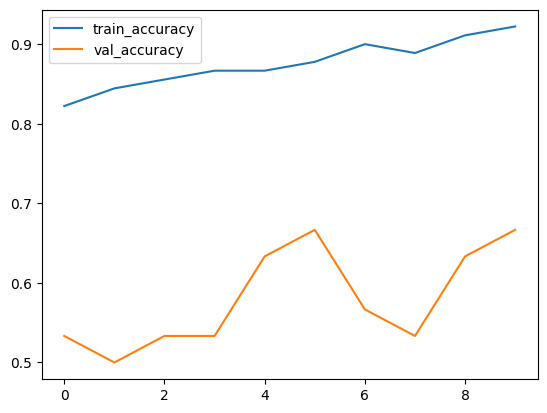

In [9]:
import matplotlib.pyplot as plt

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


##Task 2


###Data Preparation & Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/FruitinAmazon/train'
val_dir = '/content/drive/MyDrive/FruitinAmazon/test'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for inference output
)

num_classes = len(train_generator.class_indices)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


###Load VGG16 (Pre-trained) and Freeze Layers




In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False


###Add Custom Layers

In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


###Compile & Train the Model

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 28s/step - accuracy: 0.1853 - loss: 2.0371 - val_accuracy: 0.1667 - val_loss: 1.8557
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 28s/step - accuracy: 0.2227 - loss: 1.9836 - val_accuracy: 0.1667 - val_loss: 1.8230
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 28s/step - accuracy: 0.1657 - loss: 1.9133 - val_accuracy: 0.1333 - val_loss: 1.7977
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 28s/step - accuracy: 0.2087 - loss: 1.8384 - val_accuracy: 0.1333 - val_loss: 1.7774
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 28s/step - accuracy: 0.1999 - loss: 1.8890 - val_accuracy: 0.1667 - val_loss: 1.7615
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 29s/step - accuracy: 0.1646 - loss: 1.8922 - val_accuracy: 0.2000 - val_loss: 1.7473
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 28s/step - accuracy: 0.2296 - loss: 1.8489 - val_accuracy: 0.2667 - val_loss: 1.7348
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 28s/step - accuracy: 0.2188 - loss: 1.9185 - val_accuracy: 0.3333 - val_loss: 1.7235


### Evaluate + Classification Report

In [14]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation data
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Classification Report:
               precision    recall  f1-score   support

        acai       0.67      0.40      0.50         5
     cupuacu       0.33      0.40      0.36         5
    graviola       0.31      0.80      0.44         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.75      0.60      0.67         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.37        30
   macro avg       0.34      0.37      0.33        30
weighted avg       0.34      0.37      0.33        30



###Inference Output

In [16]:
print("Sample Predictions:")
for i in range(5):
    print(f"Image {i+1}: Predicted - {class_labels[y_pred_classes[i]]} | True - {class_labels[y_true[i]]}")


Sample Predictions:
Image 1: Predicted - acai | True - acai
Image 2: Predicted - acai | True - acai
Image 3: Predicted - graviola | True - acai
Image 4: Predicted - cupuacu | True - acai
Image 5: Predicted - graviola | True - acai
